## Méthode du KMeans

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=500,centers=3,cluster_std=0.5,random_state=0)

/Users/jmb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

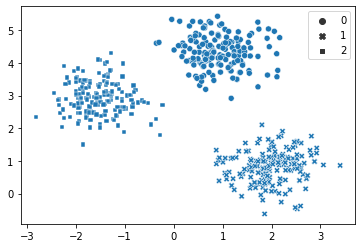

In [11]:
sns.scatterplot(X[:,0],X[:,1],style=y) 

In [12]:
from sklearn.cluster import KMeans

In [13]:
model=KMeans(n_clusters=3)

In [14]:
model.fit(X)

KMeans(n_clusters=3)

In [15]:
predictions=model.predict(X)

/Users/jmb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jmb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clusters avec centroïds')

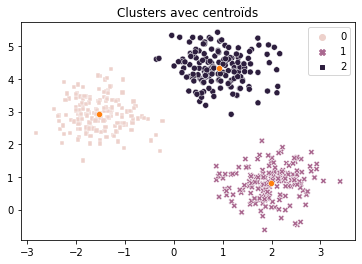

In [16]:
sns.scatterplot(X[:,0],X[:,1],hue=predictions,style=y)
sns.scatterplot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='o')
plt.title('Clusters avec centroïds')

In [17]:
model.cluster_centers_

array([[-1.51954438,  2.9270622 ],
       [ 1.9929212 ,  0.81377992],
       [ 0.9207275 ,  4.33950727]])

In [18]:
model.labels_[:20]#appartenance des 20 premiers points aux différents clusters

array([2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2],
      dtype=int32)

In [19]:
model.transform(X)[:20] #donne les distances des 20 premiers points par rapport aux centroïds
#pour le coup on voit à quel cluster appartient le point

array([[3.00650383, 3.81209618, 0.20365758],
       [0.41091479, 4.46562204, 2.85448904],
       [0.59542946, 4.09029737, 3.33024313],
       [2.87264446, 2.77052901, 0.92398692],
       [2.12084115, 4.09723018, 0.91448126],
       [2.94786111, 3.84490958, 0.18319715],
       [2.19009962, 2.72906846, 1.17791089],
       [0.53962309, 4.32418224, 2.50832699],
       [0.14057416, 4.05719033, 2.68150124],
       [2.97412593, 2.96608239, 0.76243087],
       [0.79162573, 4.83411412, 2.99575709],
       [0.40179527, 4.33194725, 2.65504892],
       [0.63339959, 4.28192308, 3.43202664],
       [0.62448246, 3.47472075, 2.57966858],
       [2.16584722, 3.66425769, 0.65873208],
       [2.64807085, 3.32854129, 0.37582571],
       [5.28466078, 1.39237077, 5.07264468],
       [4.12067995, 4.15877885, 1.30124789],
       [0.24269106, 3.88206558, 2.62531713],
       [2.79763329, 3.59245259, 0.09273079]])

In [20]:
from sklearn import metrics

* L'analyse de la silhouette peut être utilisée pour étudier la distance de séparation entre les groupes résultants. Le tracé de la silhouette affiche une mesure de la proximité de chaque point d'une grappe par rapport aux points des grappes voisines et permet ainsi d'évaluer visuellement des paramètres tels que le nombre de grappes. Cette mesure prend ses valeurs sur l'intervalle [-1, 1].

* Les coefficients de silhouette (comme ces valeurs sont appelées) proches de +1 indiquent que l'échantillon est éloigné des grappes voisines. Une valeur de 0 indique que l'échantillon est sur ou très proche de la limite de décision entre deux grappes voisines et des valeurs négatives indiquent que ces échantillons pourraient avoir été affectés à la mauvaise grappe.

* Dans cet exemple, l'analyse de la silhouette est utilisée pour choisir une valeur optimale pour n_clusters. Le tracé de la silhouette montre que les valeurs 3, 5 et 6 de n_clusters sont un mauvais choix pour les données données en raison de la présence de clusters avec des scores de silhouette inférieurs à la moyenne et aussi en raison de grandes fluctuations dans la taille des tracés de la silhouette. L'analyse de la silhouette est plus ambivalente pour prendre une décision entre 2 et 4.

* De plus, le tracé de la silhouette permet de visualiser la taille des grappes. Le tracé de la silhouette pour la grappe 0, lorsque n_grappes est égal à 2, est plus grand en raison du regroupement des 3 sous-grappes en une seule grande grappe. Cependant, lorsque le nombre n_clusters est égal à 4, tous les tracés ont plus ou moins la même épaisseur et sont donc de taille similaire, comme on peut le vérifier à partir du nuage de points marqué à droite.

In [21]:
silhouette_samples=metrics.silhouette_samples(X,model.labels_) #la silhouette mesure les propo

In [22]:
silhouette_score=metrics.silhouette_score(X,model.labels_)

In [23]:
silhouette_score  #un bon score, car proche de 1, cela signifie que les points ont été bien mis dans un cluster
#ce score représente la moyenne des silhouette_samples

0.7164181273749121

/Users/jmb/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

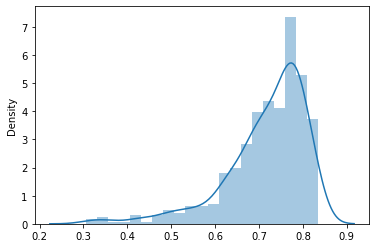

In [24]:
sns.distplot(silhouette_samples) #la distribution des distances plus c'est proche de 1, mieux c'est

In [25]:
silhouette_samples.mean()

0.7164181273749121

In [26]:
silhouette=[]
for k in range(2,30):
    model=KMeans(n_clusters=k).fit(X)
    silhouette.append(metrics.silhouette_score(X,model.labels_))


/Users/jmb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

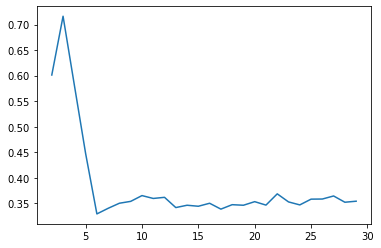

In [27]:
sns.lineplot(range(2,30),silhouette) #permet de trouver le nombre de cluster optimal quand silhouette est max
#on voit que quand le nuage est dispersé, le nombre optimum de clusters grandit pour se rapprocher du nombre de points !

In [28]:
X, y = make_blobs(n_samples=500,centers=3,cluster_std=2,random_state=0)

/Users/jmb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

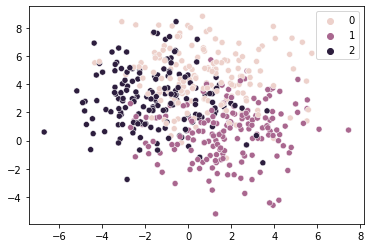

In [29]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

In [37]:
silhouette=[]
for k in range(2,100):
    model=KMeans(n_clusters=k).fit(X)
    silhouette.append(metrics.silhouette_score(X,model.labels_))


/Users/jmb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

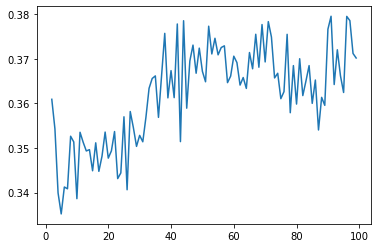

In [38]:
sns.lineplot(range(2,100),silhouette) 

In [39]:
from sklearn import datasets
from sklearn import cluster

In [40]:
X2,y2=datasets.make_blobs(1000,centers=3,cluster_std=1.75)

/Users/jmb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

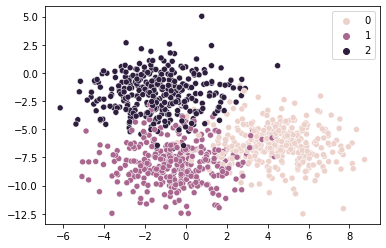

In [41]:
sns.scatterplot(X2[:,0],X2[:,1],hue=y2)

In [42]:
model2=cluster.KMeans(n_clusters=3)

In [43]:
model2.fit(X2)

KMeans(n_clusters=3)

In [44]:
model2.cluster_centers_

array([[-1.26015882, -1.88392416],
       [ 4.48956201, -6.36960619],
       [-0.64513579, -8.20033048]])

/Users/jmb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jmb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clusters avec centroïds')

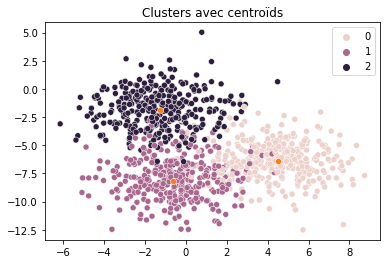

In [45]:
sns.scatterplot(X2[:,0],X2[:,1],hue=y2)
sns.scatterplot(model2.cluster_centers_[:,0],model2.cluster_centers_[:,1],marker='o')
plt.title('Clusters avec centroïds')

In [46]:
metrics.normalized_mutual_info_score(y2,model2.labels_) #coefficient de corrélation entre les nuages de points
        



0.7044417843561454

In [47]:
model2.inertia_  #c'est la somme de la différence au carré entre chaque point et son centroïd de cluster

5208.044410276689

## KMeans par MiniBatch car la méthode KMeans est extrémement gourmande en mémoire

In [48]:
from sklearn.cluster import MiniBatchKMeans

In [49]:
blobs, labels = make_blobs(int(1e6), 3)

In [50]:
kmeans=KMeans(n_clusters=3)
minibatch=MiniBatchKMeans(n_clusters=3)

In [51]:
%time kmeans.fit(blobs)

CPU times: user 3.55 s, sys: 226 ms, total: 3.77 s
Wall time: 3.17 s


KMeans(n_clusters=3)

In [52]:
%time minibatch.fit(blobs)

CPU times: user 2.13 s, sys: 109 ms, total: 2.24 s
Wall time: 2.97 s


MiniBatchKMeans(n_clusters=3)

In [53]:
kmeans.cluster_centers_

array([[ 1.89734264, -1.2638546 ,  8.51122552],
       [-6.51560724,  6.16098362, -3.10064889],
       [ 2.9704547 ,  6.52955138,  3.95942677]])

In [54]:
minibatch.cluster_centers_

array([[ 1.83709734, -1.35398241,  8.50024107],
       [-6.53605135,  6.14559471, -3.09138969],
       [ 2.98318952,  6.53448538,  3.94757972]])

In [55]:
minibatch.batch_size

100

## un autre exemple

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importer le dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values



In [59]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
#pour un nuage de points en 3D
XX=dataset.iloc[:, [1,2,3,4]].values

# Gérer les variables catégoriques
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

XX[:, 0] = labelencoder_X.fit_transform(XX[:, 0])




In [84]:
XX[:,1]

array([19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35,
       20, 52, 35, 35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 60, 21, 53, 18,
       49, 21, 42, 30, 36, 20, 65, 24, 48, 31, 49, 24, 50, 27, 29, 31, 49,
       33, 31, 59, 50, 47, 51, 69, 27, 53, 70, 19, 67, 54, 63, 18, 43, 68,
       19, 32, 70, 47, 60, 60, 59, 26, 45, 40, 23, 49, 57, 38, 67, 46, 21,
       48, 55, 22, 34, 50, 68, 18, 48, 40, 32, 24, 47, 27, 48, 20, 23, 49,
       67, 26, 49, 21, 66, 54, 68, 66, 65, 19, 38, 19, 18, 19, 63, 49, 51,
       50, 27, 38, 40, 39, 23, 31, 43, 40, 59, 38, 47, 39, 25, 31, 20, 29,
       44, 32, 19, 35, 57, 32, 28, 32, 25, 28, 48, 32, 34, 34, 43, 39, 44,
       38, 47, 27, 37, 30, 34, 30, 56, 29, 19, 31, 50, 36, 42, 33, 36, 32,
       40, 28, 36, 36, 52, 30, 58, 27, 59, 35, 37, 32, 46, 29, 41, 30, 54,
       28, 41, 36, 34, 32, 33, 38, 47, 35, 45, 32, 32, 30], dtype=object)

In [108]:
%matplotlib
from mpl_toolkits.mplot3d import Axes3D
ax=plt.axes(projection='3d')
ax.scatter(XX[:,1],XX[:,2],XX[:,3],c=XX[:,3],alpha=0.8)

Using matplotlib backend: MacOSX


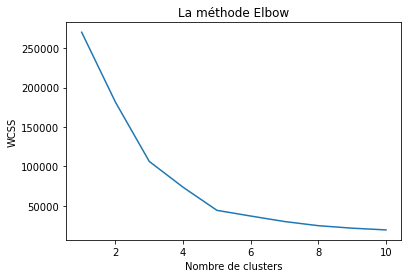

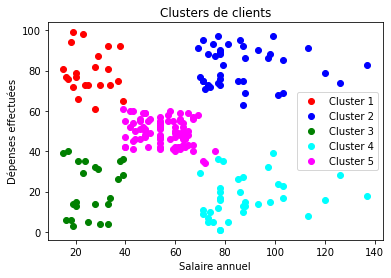

In [106]:
# Utiliser la méthode elbow pour trouver le nombre optimal de clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 11), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('score')
plt.show()

# Construction du modèle
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualiser les résultats
plt.figure()
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'magenta', label = 'Cluster 5')
plt.title('Clusters de clients')
plt.xlabel('Salaire annuel')
plt.ylabel('Dépenses effectuées')
plt.legend()